# PCA on neuronal data 

       f1     f2     f3     f4     f5
N                                    
N1  0.061  0.058  0.036  0.043  0.041
N2  0.057  0.057  0.038  0.037  0.042
N3  0.080  0.074  0.067  0.060  0.069
N4  0.116  0.098  0.082  0.081  0.087
N5  0.035  0.029  0.000  0.011  0.011


Text(0, 0.5, 'FR in f1 [sp/s]')

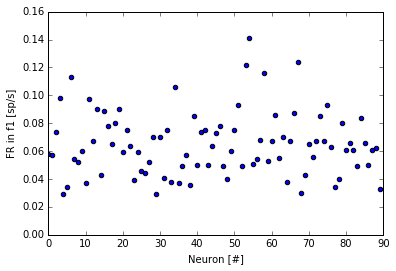

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
plt.style.use('classic')
%matplotlib inline

df = pd.read_csv('some_data.csv',index_col=0)
print(df.head())
plt.scatter(range(0,len(df.iloc[:,1])),df.iloc[:,1])
plt.xlim(0,len(df.iloc[:,1]))
plt.xlabel('Neuron [#]')
plt.ylabel('FR in f1 [sp/s]')

## we have the FR of 90 neurons, under 5 different conditions
## next, we test how many dimensions (=conditions) are needed to explain most of the variance in our data

Text(0, 0.5, 'PC2 [9.81%]')

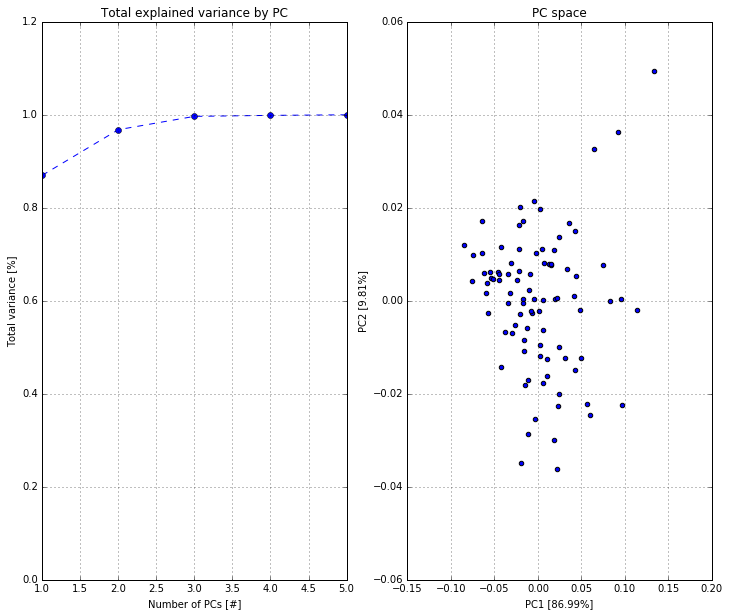

In [3]:
pca = PCA()
pca.fit(df)
var = pca.explained_variance_ratio_
#print(var.sum())

fig, ax = plt.subplots(figsize=(12,10), nrows=1, ncols=2)

ax[0].plot(range(1,6),var.cumsum(), marker = 'o', linestyle='--')
ax[0].set_title('Total explained variance by PC')
ax[0].set_xlabel('Number of PCs [#]')
ax[0].set_ylabel('Total variance [%]')
ax[0].set_ylim(0,1.2)
ax[0].grid()

pca = PCA(n_components=2)
pca.fit(df)
df_pca = pca.transform(df)
ax[1].scatter(df_pca[:,0],df_pca[:,1])
ax[1].set_title('PC space')
ax[1].grid()


ax[1].set_xlabel(f'PC1 [{100*var[0]:.2f}%]')
ax[1].set_ylabel(f'PC2 [{100*var[1]:.2f}%]')


In [ ]:
## we can see that 2 PCs account for the vast majority of the variance
### PC1 explains ~87% and PC2 ~10% 
## here, we test how many clusters are a good fit for the reduced data (in PC space)

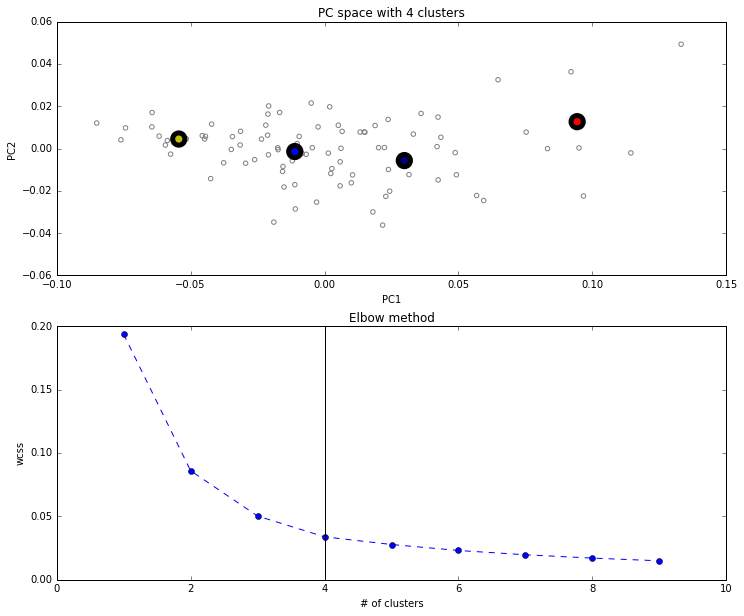

In [4]:
from sklearn.cluster import KMeans
fig, ax = plt.subplots(figsize=(12,10), nrows=2, ncols=1)

wcss = []
centroids=[]
ks=10
for i in range(1,ks):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df_pca)
    wcss.append(kmeans.inertia_)
    if i==4:
        centroids  = kmeans.cluster_centers_
        centroids_x = centroids[:,0]
        centroids_y = centroids[:,1]
        ax[0].scatter(centroids_x,centroids_y,marker = "o", s=150,linewidths = 5, zorder = 10,c=['b','r','navy','y'])
        ax[0].scatter(df_pca[:,0],df_pca[:,1], facecolors='none', edgecolors='gray')
        ax[0].set_xlabel('PC1')
        ax[0].set_ylabel('PC2')
        ax[0].set_title(f'PC space with {i} clusters')        

ax[1].plot(range(1,ks), wcss, marker='o', linestyle='--')
ax[1].set_xlabel('# of clusters')
ax[1].set_ylabel('wcss')
ax[1].set_title('Elbow method')
ax[1].set_xlim(0,ks)
ax[1].axvline(x=4,c='k')
    